# Effectiveness of Remote Employees📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
Many companies, esspecially in the IT sector, allowed employees to work from home during covid and some have continued the trend. It is still unclear if employers should allow their employees to work from home. I find this esspecially interesting since I find that my productivity drops drastically when I am in office but as I understand it most people are far more productive in the office than at home. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->
Does working from home ultimately benifit employees and employeers?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
Some visualizations like bar charts to show productivity changes over time, heatmaps to explore factors influencing productivity, and pie charts for comparing remote vs. in-office work outcomes could be a part of the answer. Ultimately I think the answer to this question will be data comparing factors like mental health, stress, productivity, engagement, coworker relations, and company profit (specifically looking at costs of outfitting employees to work from home vs housing them in an office and potentially having to do both) before and after remote work to see how the numbers stack up for both sides.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
3 Data Sources:
- Teleworking during the pandemic (https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsremotexlsx?resource=download)
- Remote Work Productivity (https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity)
- Top challenges and advantages of remote work (https://www.gallup.com/401384/indicator-hybrid-work.aspx)
- Remote Work & Mental Health (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)

I don't see ways to merge these specific datasets (though I may discover and merge others later) but mostly I plan to syntesize the data from multiple of these sources to create graphics by putting data on differnet topics side by side to show pros and cons of remote work.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [7]:
# Start your code here
import pandas as pd
import plotly.express as px

In [17]:
productiviy_df = pd.read_csv(r'Data_Sources\remote_work_productivity.csv')

mental_health_df = pd.read_csv(r'Data_Sources\Impact_of_Remote_Work_on_Mental_Health.csv')

In [ ]:
# This spreadsheet has several sections so to read it in python it will need to be broken into several sections using the formatt in the next cell.
#  As of right now the data in this sheet does not seem particularly usefull so I will not take the time to break it all the way out but I will leave it here
#  in case it becomes useful later.
TWDP_df = pd.read_excel(r'Data_Sources\remote.xlsx')

TWDP_df

In [ ]:
TWDP_age_df = TWDP_df[3:8]

TWDP_age_df.rename(columns={'Select characteristics': 'Age'}, inplace=True)

TWDP_age_df

In [31]:
advantagesDict = {}
challengesDict = {}
with open(r'Data_Sources\Top_Adv_Chlng.csv', 'r') as file:
    lineNumber = 0
    for line in file.readlines():
        lineNumber += 1
        if lineNumber in [3, 4, 5, 6, 7]:
            lineParts = line.strip().split(',')
            advantagesDict[lineParts[0]] = lineParts[1]
        elif lineNumber in [10, 11, 12, 13, 14, 15]:
            lineParts = line.strip().split(',')
            challengesDict[lineParts[0]] = lineParts[1]
        elif lineNumber == 16:
            lineParts = line.strip().split(',')
            key = f'{lineParts[0]},{lineParts[1]}'
            challengesDict[key] = lineParts[2]

adv_df_setup = {'Top Advantages': advantagesDict.keys(), 
            '% Selected as Benefits': advantagesDict.values()}
 
challenge_df_setup = {'Top Challenges': challengesDict.keys(), 
            '% Selected as Challenges': challengesDict.values()}

adv_df = pd.DataFrame(adv_df_setup)
challenge_df = pd.DataFrame(challenge_df_setup)

In [ ]:
adv_df

In [ ]:
challenge_df

In [ ]:
productiviy_df

In [53]:
mental_health_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


<Axes: title={'center': 'Productivity and well being of differnet employee modalities'}, xlabel='Employment_Type'>

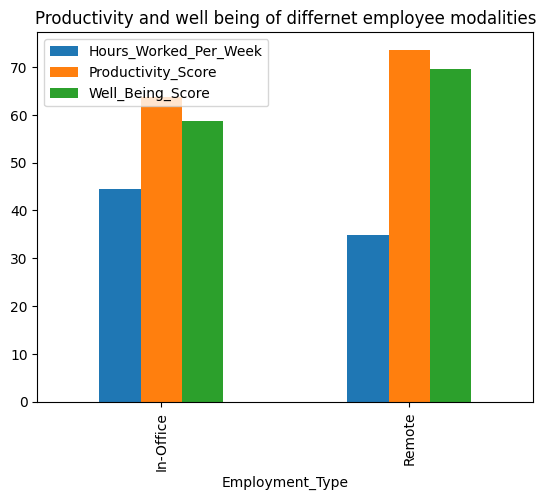

In [14]:
# Here are some visualizations to start to get a feel for the data
productivityVizDf = productiviy_df[['Employment_Type', 'Hours_Worked_Per_Week', 'Productivity_Score', 'Well_Being_Score']].groupby(['Employment_Type'], as_index=False).mean()

productivityVizDf.plot(kind='bar', x='Employment_Type', y=['Hours_Worked_Per_Week', 'Productivity_Score', 'Well_Being_Score'], title='Productivity and well being of differnet employee modalities')

This visualization is comparing in office employees to remote employees in three areas: hours worked per week, prodctivity rating, and wellnes rating
Importaint insigts are that the remote employees have the advantage in every area. They are working less time while being more productive and still reporting
higher levels of wellness than in-office employees.

In [13]:
mentalHealthVizOneDf = mental_health_df[['Work_Location', 'Work_Life_Balance_Rating']].groupby(['Work_Location'], as_index=False).mean()

# I used plotly here so that the figure was interactive and the user could scroll over to see the differences
plot = px.bar(mentalHealthVizOneDf, x='Work_Location', y='Work_Life_Balance_Rating', title='Work life balance of different employee modalities')

plot.update_layout(yaxis=dict(range=[1, 5]), width=800)

plot.show()

This visualization is comparing the rating of work life balance for different types of employees. 
It seems to show no significant difference in the work life balance of remote vs in person employess.

In [24]:
mentalHealthVizTwoDf = mental_health_df

# Group data by Work_Location and Stress_Level to get counts
sunburst_data = mentalHealthVizTwoDf.groupby(['Work_Location', 'Stress_Level']).size().reset_index(name='Count')

# Create the sunburst plot
plot = px.sunburst(
    sunburst_data,
    path=['Work_Location', 'Stress_Level'],  # Define the hierarchy
    values='Count',  # Size of each slice
    color='Stress_Level',  # Color by stress level
    color_discrete_map={'High': 'red', 'Medium': 'orange', 'Low': 'green'}  # Custom colors
)

# Update layout for readability
plot.update_layout(
    title="Stress Level Distribution by Work Location",
    margin=dict(t=40, l=0, r=0, b=0)
)

plot.show()

This visualization shows the the breakdown of amount of stress among the differnt work types. They are very similar again, though it is worth noting that onsite has the least "High" stressed individuals and remote has the most. This would suggest that overall it is not a huge difference but working remotly may be slightly more stressful.

In [25]:
mentalHealthVizThreeDf = mental_health_df

# Group data by Work_Location and Productivity_Change to get counts
sunburst_data = mentalHealthVizThreeDf.groupby(['Work_Location', 'Productivity_Change']).size().reset_index(name='Count')

# Create the sunburst plot
plot = px.sunburst(
    sunburst_data,
    path=['Work_Location', 'Productivity_Change'],  # Define the hierarchy
    values='Count',  # Size of each slice
    color='Productivity_Change',  # Color by stress level
    color_discrete_map={'Decrease': 'red', 'No Change': 'grey', 'Increase': 'green'}  # Custom colors
)

# Update layout for readability
plot.update_layout(
    title="Change in productivity by Work Location",
    margin=dict(t=40, l=0, r=0, b=0)
)

plot.show()

This visualization shows the change in productivity bewtween different work modalities. All of them had more decreases than increases but again there do not appear to be significant statistical differances between the categories. It would seem upon cursory analysis that there many not be clear trends about remote work's effects on productivity.

The data I found seems to have already been cleaned and I did not find any issues that I needed to adress.

I did not really recieve any prior feedback.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
- https://docs.python.org/3/library/stdtypes.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html 
- https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html
- https://plotly.com/python/
- ChatGPT

In [26]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 7817 bytes to source.py
